<a href="https://colab.research.google.com/github/Sachinvt/Sachinvt/blob/main/Customer_churn_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

The task is to develop a machine learning model that predicts customer churn based on historical customer data. The provided dataset contains information about customer attributes, interactions, and whether they churned or not. Customer churn refers to customers discontinuing their business relationship with the company.

# **Problem Solving Approach**

To solve this problem, I need to follow a typical machine learning project pipeline. Here's a step-by-step approach to tackle the tasks mentioned in the assignment:

**Data Preprocessing:**
Load the provided dataset using a library like pandas and perform initial data exploration. This includes checking for the structure of the data, data types, and a summary of statistics.

**Handle missing data:**
Identify and address missing values, which can be done by imputing values or removing rows/columns with missing data, depending on the situation.

**Outlier handling:**
Identify and deal with outliers in the data using techniques such as z-score or IQR (Interquartile Range).

**Data encoding:**
Convert categorical variables into numerical form, typically using one-hot encoding or label encoding.
Split the dataset into training and testing sets. This allows you to train the model on one subset and evaluate its performance on another.

**Feature Engineering:**
Generate relevant features from the dataset that can help improve the model's prediction accuracy. For example, you can calculate customer tenure, interaction frequency, or customer satisfaction scores.
Apply feature scaling or normalization if necessary, especially if using models sensitive to feature scales (e.g., logistic regression, support vector machines).

**Model Building:**
Choose appropriate machine learning algorithms. Common choices for customer churn prediction include logistic regression, random forest, decision trees, support vector machines, and neural networks.
Train and validate the selected model on the training dataset. Use techniques like cross-validation to ensure robustness.
Evaluate the model's performance using appropriate metrics, such as accuracy, precision, recall, F1-score, and the ROC curve.

**Model Optimization:**
Fine-tune the model parameters to improve predictive performance. You can use techniques like grid search or random search for hyperparameter tuning.
Explore cross-validation to ensure the model's generalization to unseen data.

**Model Deployment:**
Deploy the model into a simulated production-like environment where it can take new customer data as input and provide churn predictions.
Ensure the model is integrated with your application or systems for real-time predictions.

**Documentation and Reporting:**
Document your code and the steps you've taken in a Python script.
Provide a brief report summarizing your approach, including details on data preprocessing, feature engineering, model selection, and deployment.
Include model performance metrics and visualizations in your report to demonstrate the effectiveness of the model.

Overall, the goal is to build a predictive model that helps Sunbase understand and potentially reduce customer churn. The evaluation will be based on your ability to handle data, engineer features, select and optimize models, and deploy them effectively. Good luck with your project!

# **Data Collection and Exploration**

In [293]:
# Import Libraries
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

In [294]:
# Load Dataset
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [295]:
#reading csv file
working_dir_path="/content/drive/MyDrive/Sunbase Assignment/customer_churn_large_dataset.xlsx"
df=pd.read_excel(working_dir_path)

In [296]:
#Showing top five rows of customer churn data
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [297]:
# Showing Last five rows of customer churn data
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [194]:
# Showing each column unique values
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [195]:
# Get the dimensions (number of rows and columns) of the DataFrame 'df'
df.shape

(100000, 9)

In [196]:
# Display information about the DataFrame 'df', including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [197]:
# Generate descriptive statistics of the DataFrame 'df'
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


# **Data Preprocessing**

# **Missing Value and Duplicate Values Treatment**

In [298]:
# Calculate the count of missing (null) values for each column in the DataFrame 'df'
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [299]:
# Calculate the count of duplicated rows in the DataFrame 'df'
df.duplicated().sum()

0

Findings-

From the above data conclude that there is no missing or duplicate values in given data so there is no need to do missing value imputations or drop duplicate values.

In [300]:
# Get the colinearity among each attribute
df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


# Finding

Basically dataset contains 100000 rows and 9 columns. Column atrribute consists of Customer_ID, Customer_name, Age, Subscription_Lenght_Months,Monthly_Bill,Total_Usage_GB,Churn etc. Categorical variables are Gender,Location and Name.Customer_Id and Name columns contains all unique values so it is act as primary key which has no use in model preparation. In this data there is no missing values as well as duplicate values.Almost All columns attributes having same value of mean and median.

Data Attributes details-

**CustomerID** Unique number assign to each customer.

**Name** Customer Name.

**Age** Age of the Customer.

**Subscription_Lenght_Month** Duration of month usage of each customer.

**Monthly_Bill** Invoice on monthly basis.

**Total_Usage_GB** Total usage of particular customer.

**Churn** Whether Customer retain or not.

In [301]:
# Select columns with numeric data types (excluding object/string types) from the DataFrame 'df'
numeric_columns = df.select_dtypes(exclude="object")

In [302]:
# Select columns with categorical data types (specifically, object/string types) from the DataFrame 'df'
categorical_column = df.select_dtypes(include="object")

In [303]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"]

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 6 numerical features: ['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']
We have 3 categorical features: ['Name', 'Gender', 'Location']


# **Check Class imbalance in Target Variable**

In [304]:
# Count the unique values in the 'Churn' column of the DataFrame 'df'
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [305]:
# Calculate the percentage distribution of unique values in the 'Churn' column of the DataFrame 'df'
percentage = df['Churn'].value_counts(normalize=True)*100
percentage

0    50.221
1    49.779
Name: Churn, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

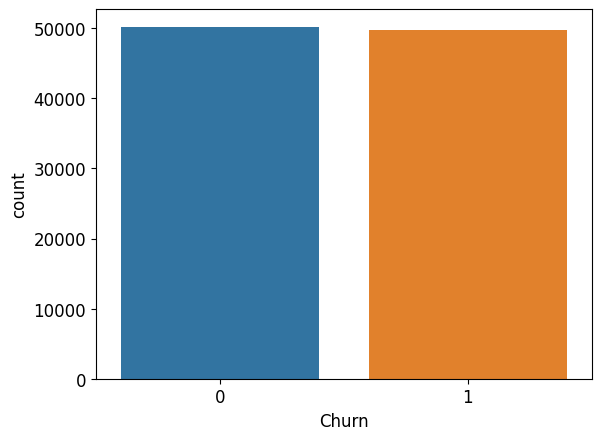

In [306]:
# Create a countplot to visualize the distribution of 'Churn' values in the DataFrame 'df'
sns.countplot(data=df,x=df['Churn'])

Finding-

From above countplot it displays that there is no class imbalance observed in the given churn column attribute.

# **Outlier Treatment**

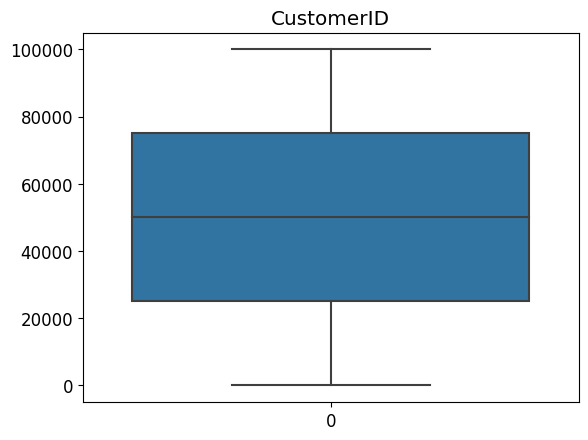

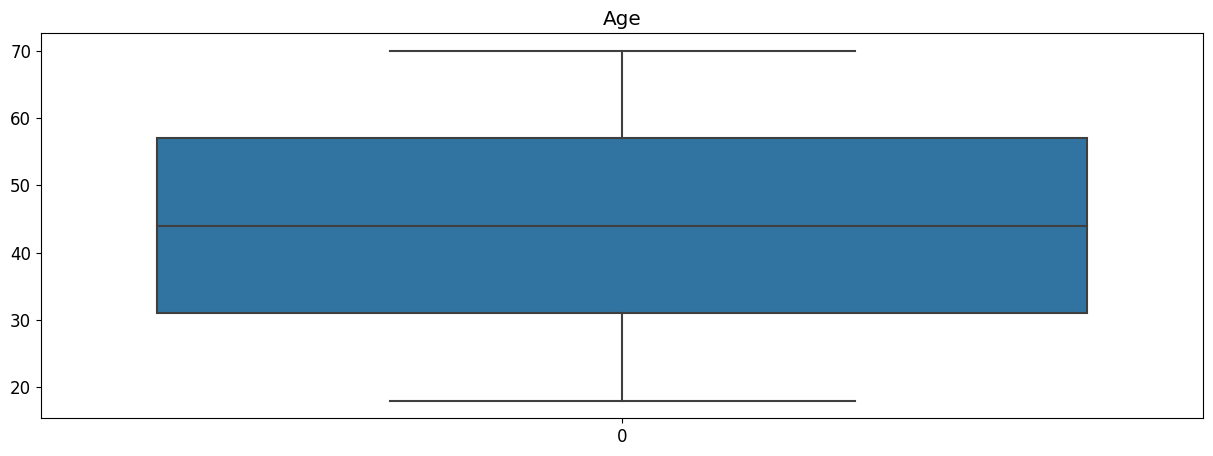

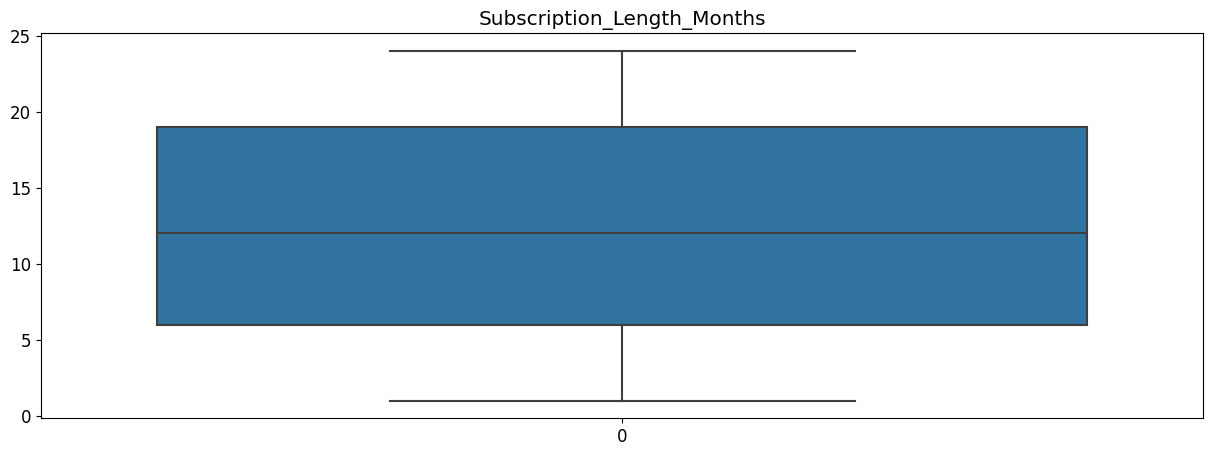

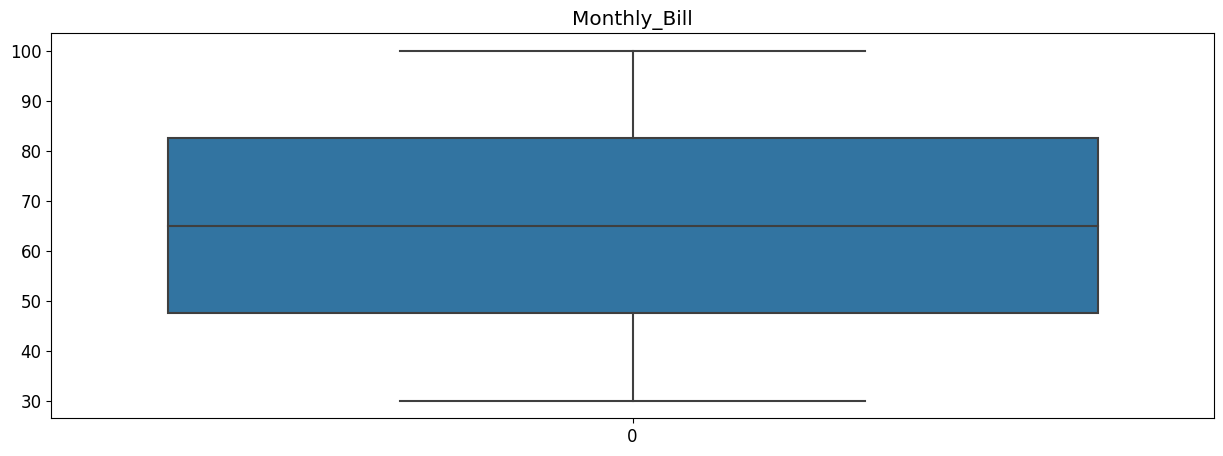

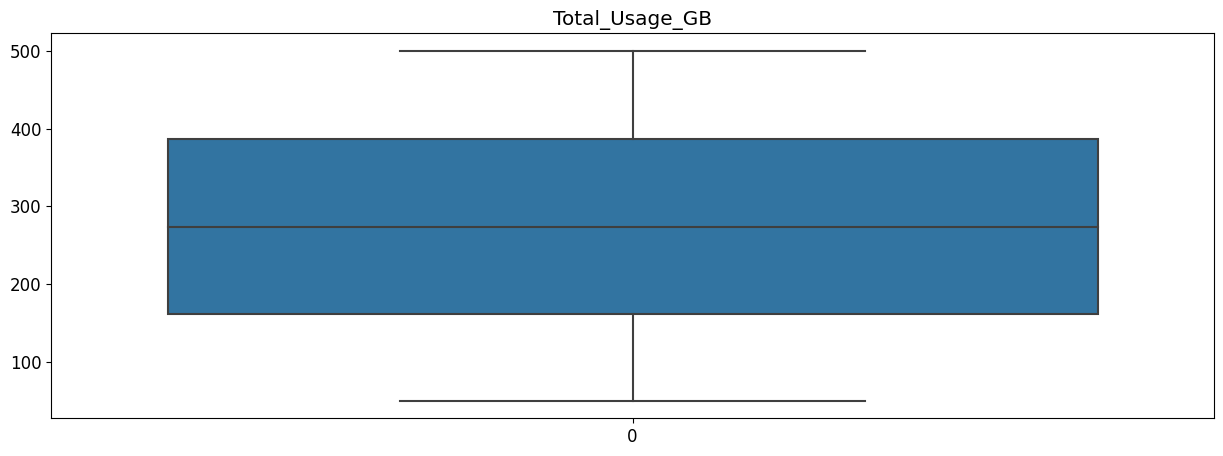

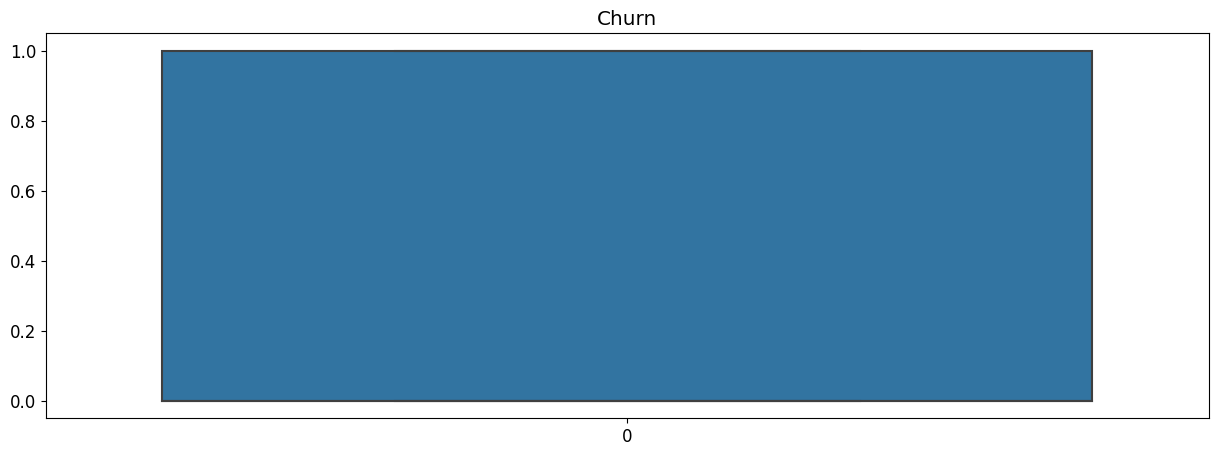

<Figure size 1500x500 with 0 Axes>

In [307]:
# Plot the boxplot using seaborn library for outlier indentification in each column variable.
for feature in numeric_features:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,5))

Finding-

From above box plot it depicts that there is no any values pertains to upper or lower boundary level so there is no any outlier present in given data.

# **Dummy Variable Creation**

In [308]:
# Use pd.get_dummies() to create dummy variables for categorical columns
# The drop_first=True parameter drops the first level of each categorical feature to avoid multicollinearity
df = df.drop(['CustomerID','Name'], axis=1) # As we have no use of this columns feature for model preparation so we drop this
df = pd.get_dummies(df,drop_first=True)

In [209]:
# To show first five rows of dataframe
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


# **Feature Selection**

In [309]:
# X contains the feature columns (independent variables)
X = df.drop(['Churn'], axis=1)

In [310]:
# Y contains the target column (dependent variable)
Y = df[['Churn']]

In [213]:
X

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,1
2,24,5,85.47,460,0,0,1,0,0
3,36,3,97.94,297,0,0,0,1,0
4,46,19,58.14,266,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,1,1,0,0,0
99996,62,19,61.65,351,0,0,0,0,1
99997,64,17,96.11,251,1,0,0,0,0
99998,51,20,49.25,434,0,0,0,0,1


In [214]:
Y

,Churn
0,0
1,0
2,0
3,1
4,0
...,...
99995,1
99996,0
99997,1
99998,1


# **Feature scaling**

In [311]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
sc = StandardScaler()
# Use the fit_transform method of the StandardScaler to standardize the feature matrix X
X = sc.fit_transform(X)

In [216]:
X

array([[ 1.24167039,  0.65111499,  0.41060598, ...,  1.99744111,
        -0.50048433, -0.49707639],
       [ 1.17622625, -1.65887854, -0.80537409, ..., -0.50064054,
        -0.50048433,  2.01176322],
       [-1.31065114, -1.08138015,  1.0092043 , ...,  1.99744111,
        -0.50048433, -0.49707639],
       ...,
       [ 1.30711454,  0.65111499,  1.5351404 , ..., -0.50064054,
        -0.50048433, -0.49707639],
       [ 0.45634069,  1.08423877, -0.78115335, ..., -0.50064054,
        -0.50048433,  2.01176322],
       [-1.11431871,  0.93986418,  0.56927655, ...,  1.99744111,
        -0.50048433, -0.49707639]])

# **Model Training**

Splitting Dataset into Training set and Testing set Dividing the Training and Testing Data in 80:20

In [312]:
# Split the features (X) and target (Y) into training and testing sets
# X_train and Y_train are for training, and X_test and Y_test are for testing
# The 'test_size' parameter specifies the proportion of the data to be used for testing (e.g., 0.2 for 20% testing)
# The 'random_state' parameter sets a seed for random number generation to ensure reproducibility
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [218]:
Y_test.shape

(20000, 1)

In [219]:
X_train.shape

(80000, 9)

## Logistic Regression

In [313]:
from sklearn.linear_model import LogisticRegression
# Create an instance of the LogisticRegression model with random_state=0 for reproducibility
cl_lr = LogisticRegression(random_state=0)
# Fit the logistic regression model to the training data
cl_lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [314]:
# Use the predict method of the logistic regression model to make predictions on the test data X_test
y_pred_lr = cl_lr.predict(X_test)

In [315]:
# Model evaluation on the basis of various performance metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score
# Calculate the accuracy score by comparing the true labels Y_test with the predicted labels y_pred_lr
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
precision_score = precision_score(Y_test, y_pred_lr)
recall_score = recall_score(Y_test, y_pred_lr)
# Print the evaluation metrics
print("Accuracy score for logistic regression:",accuracy_lr)
print("Precision score for logistic regression:", precision_score)
print("Recall score for logistic regression:",recall_score)

Accuracy score for logistic regression: 0.49935
Precision score for logistic regression: 0.4943342776203966
Recall score for logistic regression: 0.45786658593198104


<Axes: >

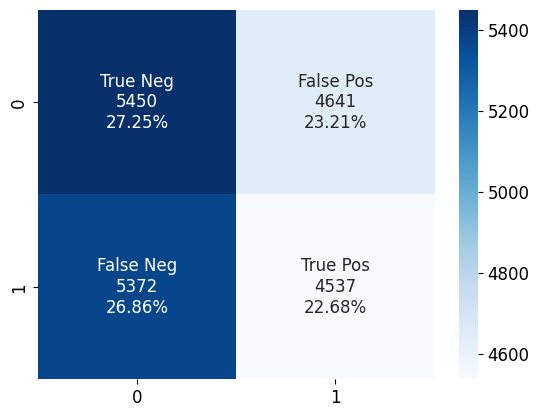

In [316]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cl_lr = confusion_matrix(Y_test, y_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cl_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cl_lr.flatten()/np.sum(cl_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cl_lr, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.4989759051947092


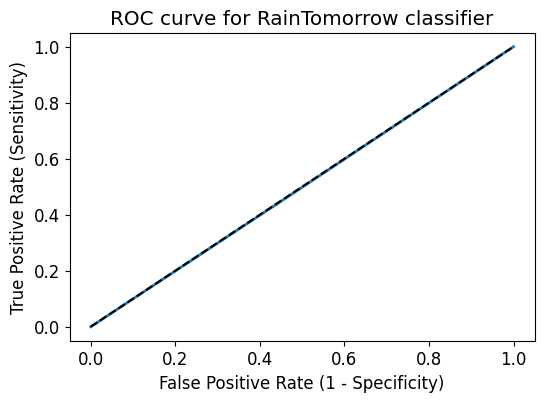

In [317]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve
# Print ROC score
roc_auc = roc_auc_score(Y_test, y_pred_lr)
print("Receiver_operating_characteristics_score:",roc_auc)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_lr, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Linear Discriminant Analysis

In [318]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create an instance of the Linear Discriminant Analysis (LDA) classifier
clf_lda = LinearDiscriminantAnalysis()
# Fit the LDA classifier to the training data
clf_lda.fit(X_test,Y_test)

LinearDiscriminantAnalysis()

In [319]:
# Make predictions on new data (X_test)
y_pred_lda = clf_lda.predict(X_test)

In [282]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculate the accuracy score by comparing the true labels Y_test with the predicted labels y_pred_lr
accuracy_lda = accuracy_score(Y_test, y_pred_lda)
precision_score = precision_score(Y_test, y_pred_lda)
recall_score = recall_score(Y_test, y_pred_lda)
print("Accuracy score for LDA:",accuracy_lda)
print("Precision score for LDA:", precision_score)
print("Recall score for LDA:",recall_score)

Accuracy score for LDA: 0.50965
Precision score for LDA: 0.5074409104172746
Recall score for LDA: 0.3509940458169341


<Axes: >

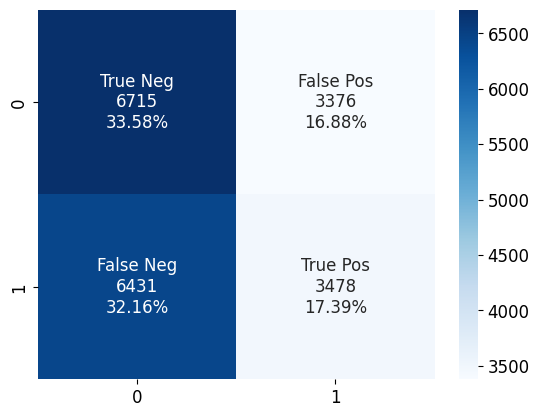

In [283]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
clf_lda = confusion_matrix(Y_test, y_pred_lda)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_lda.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_lda.flatten()/np.sum(clf_lda)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_lda, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.5082192506361451


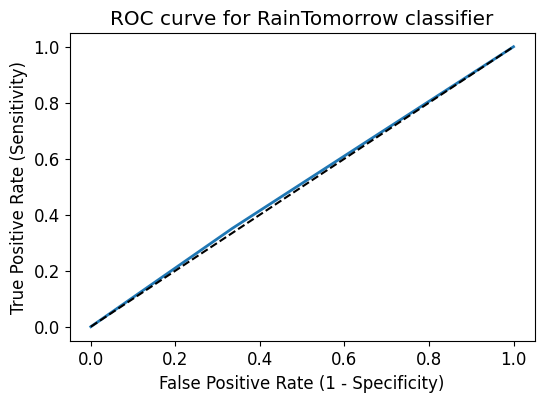

In [284]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve

#Print ROC score
roc_auc_lda = roc_auc_score(Y_test, y_pred_lda)
print("Receiver_operating_characteristics_score:",roc_auc_lda)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_lda, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# K_Nearest_Neighbors(KNN)

In [230]:
from sklearn import preprocessing
# Create an instance of the StandardScaler and fit it to the training data X_train
scaler = preprocessing.StandardScaler().fit(X_train)
# Use the transform method of the scaler to standardize the training data X_train
X_train_s = scaler.transform(X_train)

In [231]:
# Create an instance of the StandardScaler and fit it to the test data X_test using the parameters learned from X_train
scaler = preprocessing.StandardScaler().fit(X_test)
# Use the transform method of the scaler to standardize the test data X_test
X_test_s = scaler.transform(X_test)

In [232]:
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of the K-Nearest Neighbors (KNN) classifier with n_neighbors=1
clf_knn_1 = KNeighborsClassifier(n_neighbors = 1)
# Fit the KNN classifier to the training data
clf_knn_1.fit(X_train_s,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [233]:
# Make predictions on new data (X_test)
y_pred_knn = clf_knn_1.predict(X_test_s)

In [234]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Print performance metrics
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
precision_score = precision_score(Y_test, y_pred_knn)
recall_score = recall_score(Y_test, y_pred_knn)
print("Accuracy score for LDA:",accuracy_knn)
print("Precision score for LDA:", precision_score)
print("Recall score for LDA:",recall_score)

Accuracy score for LDA: 0.49295
Precision score for LDA: 0.48827809215844786
Recall score for LDA: 0.4876375012614795


<Axes: >

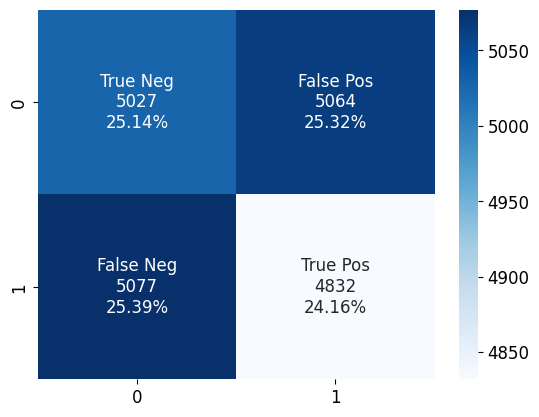

In [235]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
clf_knn_1 = confusion_matrix(Y_test, y_pred_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_knn_1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_knn_1.flatten()/np.sum(clf_knn_1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_knn_1, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.4929020922222569


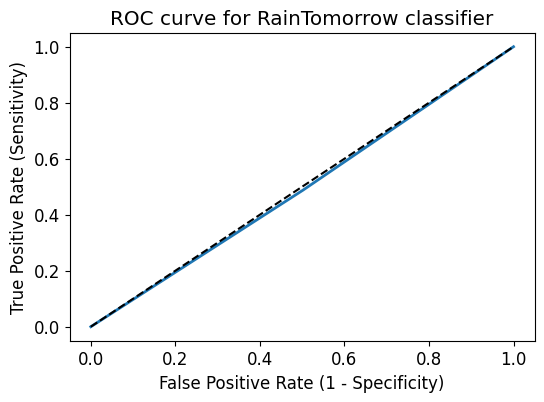

In [236]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve


roc_auc_knn = roc_auc_score(Y_test, y_pred_knn)
print("Receiver_operating_characteristics_score:",roc_auc_knn)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_knn, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Random Forest Classifier

In [237]:
from sklearn import preprocessing
# Create an instance of the StandardScaler and fit it to the training data X_train
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [238]:
# Use the transform method of the scaler to standardize the test data X_test
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [239]:
# Fitting RandomForestClassifier to the model
from sklearn.ensemble import  RandomForestClassifier

clf_rfs = RandomForestClassifier(n_estimators=100, random_state=0)
clf_rfs.fit(X_train_s, Y_train)

RandomForestClassifier(random_state=0)

In [240]:
# Make predictions on new data (X_test)
y_pred_rfs = clf_rfs.predict(X_test)

In [241]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Print Performance metrics
accuracy_rfs = accuracy_score(Y_test, y_pred_rfs)
precision_rfs = precision_score(Y_test, y_pred_rfs)
recall_rfs = recall_score(Y_test, y_pred_rfs)

print("Accuracy score for Random forest:", accuracy_rfs)
print("Precision score for Random forest:", precision_rfs)
print("Recall score for Random forest:", recall_rfs)

Accuracy score for Random forest: 0.4956
Precision score for Random forest: 0.4905401120388965
Recall score for Random forest: 0.46836209506509235


<Axes: >

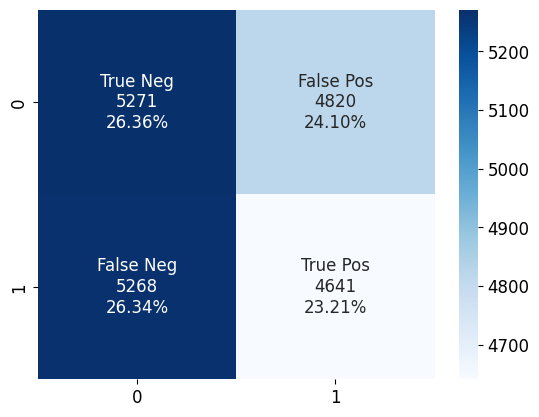

In [242]:
# Creating the Confusion matrix
clf_rfs = confusion_matrix(Y_test, y_pred_rfs)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_rfs.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_rfs.flatten()/np.sum(clf_rfs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_rfs, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.4953543702954042


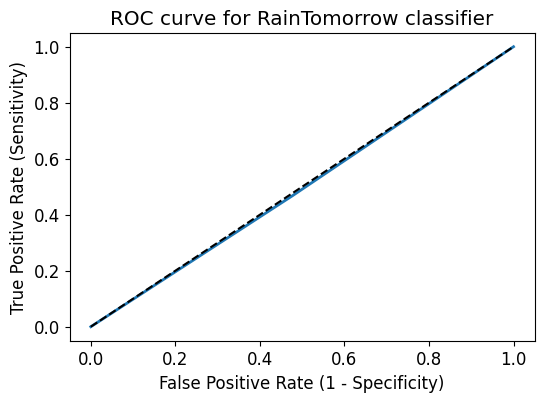

In [243]:
# Plot the ROC Curve and ROC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_rfs, drop_intermediate=False)

roc_auc_rfs = roc_auc_score(Y_test, y_pred_rfs)
print("Receiver_operating_characteristics_score:",roc_auc_rfs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Grid Search (Hyperparameter tuning)

In [244]:
from sklearn.model_selection import GridSearchCV
# Create a Random Forest classifier
rf = RandomForestClassifier()
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [245]:
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [246]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [247]:
# Make predictions on new data (X_test)
y_pred_best_rf = grid_search.predict(X_test)

In [248]:
# Use the best model to make predictions and evaluate
accuracy = best_rf_model.score(X_test, Y_test)
precision = precision_score(Y_test, y_pred_best_rf)
recall = recall_score(Y_test, y_pred_best_rf)
print("Best Model Accuracy:", accuracy)
print("Best Model Precision:",precision)
print("Best Model Recall:",recall)

Best Model Accuracy: 0.5026
Best Model Precision: 0.49779386808462495
Best Model Recall: 0.44404077101624784


<Axes: >

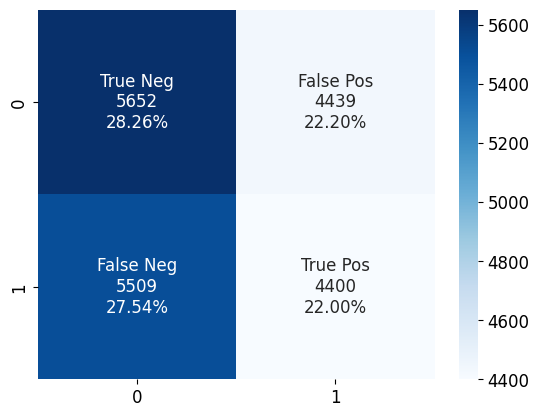

In [249]:
# Creating the Confusion matrix
grid_search = confusion_matrix(Y_test, y_pred_best_rf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                grid_search.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     grid_search.flatten()/np.sum(grid_search)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(grid_search, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.5020719165754116


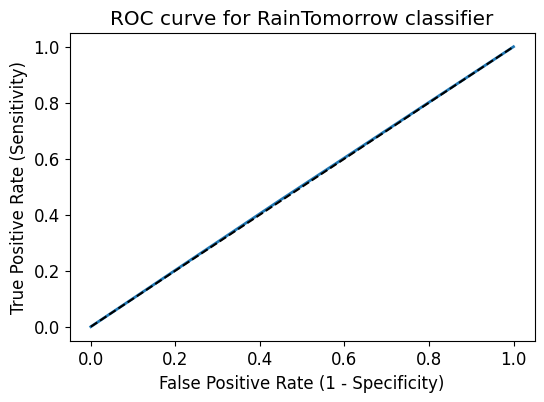

In [250]:
# Plot the ROC Curve and ROC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_best_rf, drop_intermediate=False)

roc_auc_best_rf = roc_auc_score(Y_test, y_pred_best_rf)
print("Receiver_operating_characteristics_score:",roc_auc_best_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# XG Boost Classifier

In [251]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Create an XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,   # Number of boosting rounds (trees)
    max_depth=3,        # Maximum depth of each tree
    min_child_weight=1, # Minimum sum of instance weight (Hessian) needed in a child
    gamma=0,            # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,      # Subsample ratio of the training instances
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    objective='binary:logistic',  # Binary classification
    nthread=-1,        # Number of parallel threads
    seed=42            # Random seed
)

In [252]:
# Train the XGBoost Classifier on the training data
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [253]:
# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)
# Calculate accuracy
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

XGBoost Classifier Accuracy: 0.5016


# Decision Trees

In [254]:
#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [255]:
# Use the trained Decision Tree classifier to make predictions on X_test
y_pred_dt = clf_dt.predict(X_test)

In [256]:
# Print the model performance metrics
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
precision_dt = precision_score(Y_test, y_pred_dt)
recall_dt = recall_score(Y_test, y_pred_dt)

print("Accuracy score for Decision Tree:", accuracy_dt)
print("Precision score for Decision Tree:", precision_dt)
print("Recall score for Decision Tree:", recall_dt)

Accuracy score for Decision Tree: 0.49745
Precision score for Decision Tree: 0.4929423459244533
Recall score for Decision Tree: 0.5004541326067211


<Axes: >

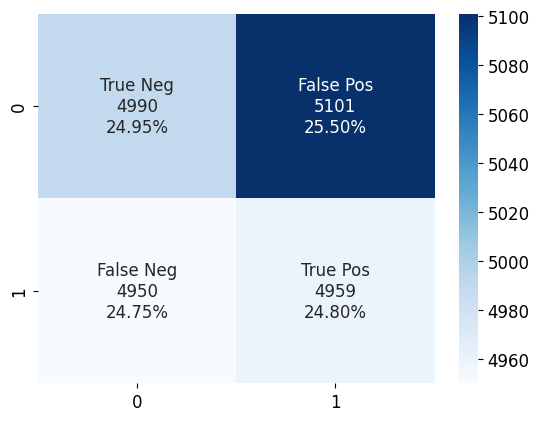

In [257]:
# Print the confusion matrix
clf_dt = confusion_matrix(Y_test, y_pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_dt.flatten()/np.sum(clf_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_dt, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.49747709107791216


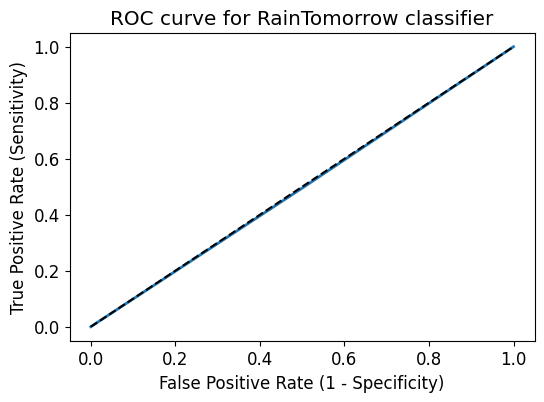

In [258]:
# Print ROC curve and ROC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_dt, drop_intermediate=False)

roc_auc_dt = roc_auc_score(Y_test, y_pred_dt)
print("Receiver_operating_characteristics_score:",roc_auc_dt)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Light GBM

In [259]:
# Fitting the Light GBM model for train data
from lightgbm import LGBMClassifier

clf_lgbm = LGBMClassifier(random_state = 0)
clf_lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 39870, number of negative: 40130
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498375 -> initscore=-0.006500
[LightGBM] [Info] Start training from score -0.006500


LGBMClassifier(random_state=0)

In [260]:
# Use the trained Decision Tree classifier to make predictions on X_test
y_pred_lgbm = clf_lgbm.predict(X_test)
# Print Performance metrics for model evaluation
accuracy_lgbm = accuracy_score(Y_test, y_pred_lgbm)
precision_lgbm = precision_score(Y_test, y_pred_lgbm)
recall_lgbm = recall_score(Y_test, y_pred_lgbm)

print("Accuracy score for LightGBM:", accuracy_lgbm)
print("Precision score for LightGBM:", precision_lgbm)
print("Recall score for LightGBM:", recall_lgbm)

Accuracy score for LightGBM: 0.5002
Precision score for LightGBM: 0.49534211371667203
Recall score for LightGBM: 0.46684831970935514


<Axes: >

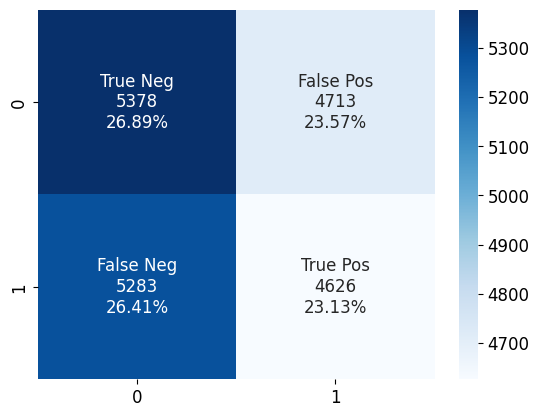

In [261]:
# Print the confusion matrix
clf_lgbm = confusion_matrix(Y_test, y_pred_lgbm)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_lgbm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_lgbm.flatten()/np.sum(clf_lgbm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_lgbm, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.4998992366557875


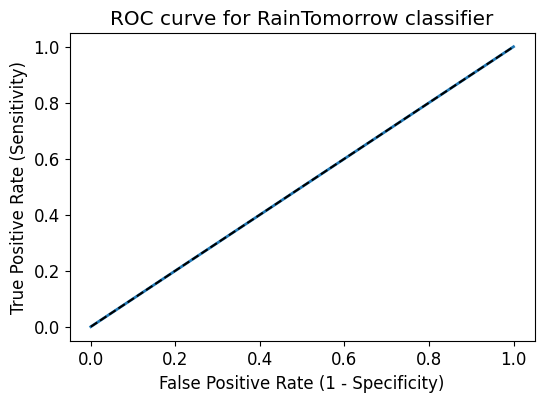

In [262]:
# Print the ROC curve and ROC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_lgbm, drop_intermediate=False)

roc_auc_rfs = roc_auc_score(Y_test, y_pred_lgbm)
print("Receiver_operating_characteristics_score:",roc_auc_rfs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Naive Bayes

In [263]:
# Fitting the Naive Bayes model for train data
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)

GaussianNB()

In [264]:
# Use the trained Decision Tree classifier to make predictions on X_test
y_pred_nb = clf_nb.predict(X_test)

In [265]:
# Print the performance metrics for model evaluation
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
precision_nb = precision_score(Y_test, y_pred_nb)
recall_nb = recall_score(Y_test, y_pred_nb)

print("Accuracy score for Naive Bayes:", accuracy_nb)
print("Precision score for Naive Bayes:", precision_nb)
print("Recall score for Naive Bayes:", recall_nb)

Accuracy score for Naive Bayes: 0.5044
Precision score for Naive Bayes: 0.4998481935026819
Recall score for Naive Bayes: 0.4984357654657382


<Axes: >

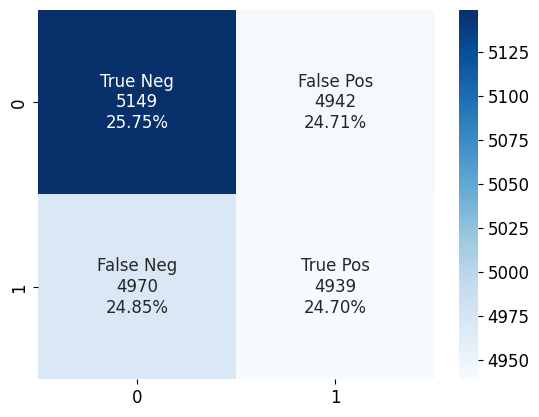

In [266]:
# Print the confusion matrix
clf_nb = confusion_matrix(Y_test, y_pred_nb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_nb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_nb.flatten()/np.sum(clf_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_nb, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.5043462149100566


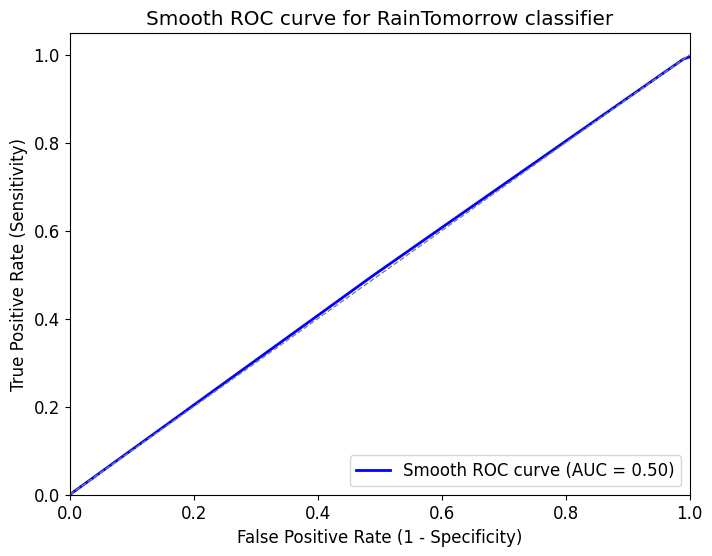

In [271]:
# Print ROC curve and ROC score
from scipy import interp
fpr, tpr, _ = roc_curve(Y_test, y_pred_nb)
mean_fpr = np.linspace(0, 2, 100)
mean_tpr = interp(mean_fpr, fpr, tpr)
roc_auc_rfs = roc_auc_score(Y_test, y_pred_nb)
print("Receiver_operating_characteristics_score:",roc_auc_rfs)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, label='Smooth ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Smooth ROC curve for RainTomorrow classifier')
plt.legend(loc='lower right')
plt.show()

# Neural Network

In [273]:
from keras.models import Sequential
from keras.layers import Dense
# Create a neural network model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add additional hidden layers
model.add(Dense(units=32, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
2500/2500 [==============================] - 13s 3ms/step - loss: 0.6945 - accuracy: 0.4995
Epoch 2/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6934 - accuracy: 0.5047
Epoch 3/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6932 - accuracy: 0.5054
Epoch 4/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 5/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6930 - accuracy: 0.5057
Epoch 6/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6930 - accuracy: 0.5080
Epoch 7/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6929 - accuracy: 0.5097
Epoch 8/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6927 - accuracy: 0.5116
Epoch 9/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6927 - accuracy: 0.5103
Epoch 10/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6940

# **Model Selection for best accuracy**

In [268]:
# Create a dictionary containing the accuracy scores of different models
accuracy_dict = {"Logistic Regression": accuracy_lr,
                 "LDA": accuracy_lda,
                 "KNN": accuracy_knn,
                 "Random Forest": accuracy_rfs,
                 "Random Forest with grid search": accuracy,
                 "Decision Trees": accuracy_dt,
                 "LightGBM": accuracy_lgbm,
                 "Naive Bayes": accuracy_nb}
# Create a pandas DataFrame from the accuracy_dict with "Accuracy" as the column name
accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.49935
LDA,0.50965
KNN,0.49295
Random Forest,0.49560
Random Forest with grid search,0.50260
Decision Trees,0.49745
LightGBM,0.50020
Naive Bayes,0.50440


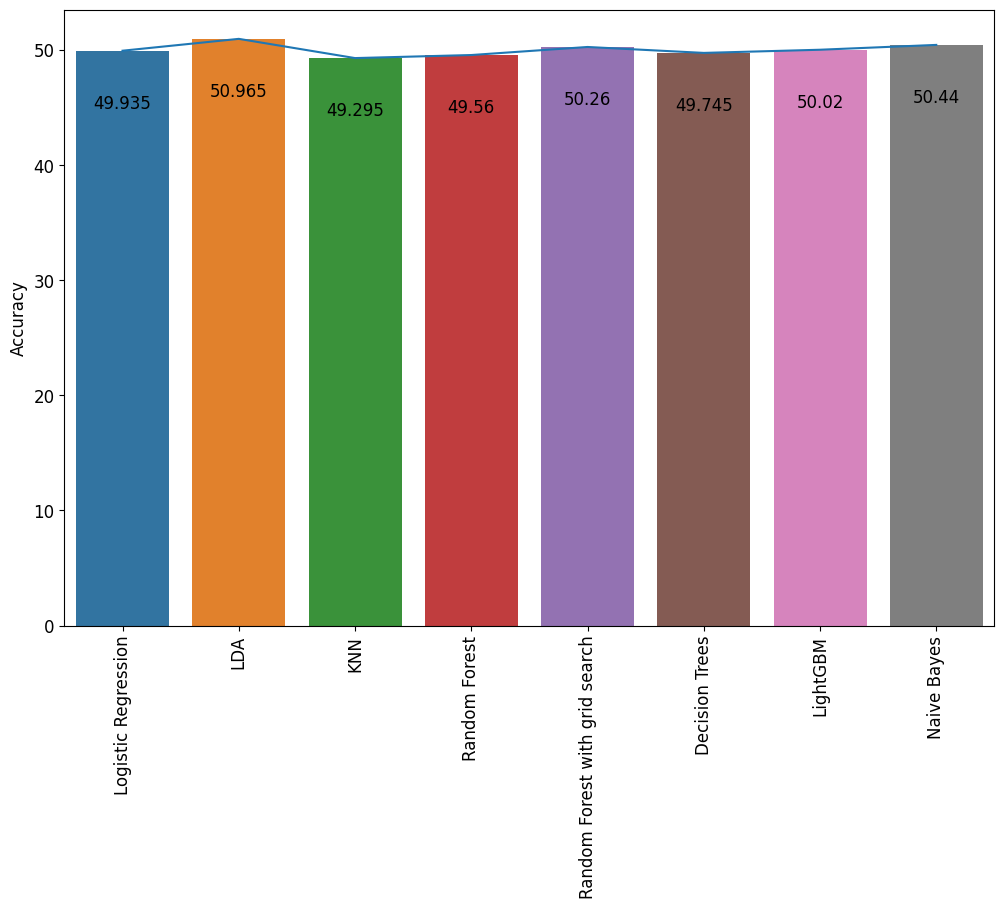

In [269]:
# Create Visualization for different model trained accuracy for comparison
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.xticks(rotation=90)
    plt.text(i, y-5, str(y), ha = "center")

Observations-


The best-performing model is the "LDA," which achieved the highest accuracy of 0.5096 on the given dataset. It outperformed all other models in terms of accuracy and is recommended for further consideration or deployment on new data.

# **Model deployement**

In [270]:
import pandas as pd
import pickle

In [320]:
best_clf_lda = clf_lda.fit(X_train,Y_train)

In [324]:
input1 = [[35,14,86.98,487,1,0,0,1,0]]
input2 = [[42,18,76.75,345,0,0,0,0,1]]

In [325]:
prediction1 = best_clf_lda.predict(input1)

pred = int(prediction1[0])
if pred == 0:
    print("Customer not churned")
else:
    print("Customer is Churned")

Customer not churned


In [326]:
prediction2 = best_clf_lda.predict(input2)
pred = int(prediction2[0])
if pred == 0:
    print("Customer not churned")
else:
    print("Customer is churned")

Customer not churned


# **Conclusion**

The initial approach involved data preprocessing, feature engineering, and model selection, focusing on Logistic Regression. To achieve higher accuracy, implementing a neural network is recommended. The choice of model and approach may vary based on the dataset's characteristics and the desired level of prediction accuracy.

This report summarizes the initial steps of the project and suggests further improvements to enhance the model's predictive capabilities for customer churn prediction.